In [1]:
import os

import torch
import numpy as np
from offline.convert_datset import merge_rllib_out
from dynamic_programming.policy_iteration import PolicyIteration, PolicyIterationTorch
from dynamic_programming.mdp_model import MDPModel, DPPolicy

import time

## Load Data and MDP Model

In [2]:
device = 'cpu'
load_path = os.path.join("tmp", "ibqf-out/ibq_samples.npy")
#load_path = os.path.join("tmp", "ibq_samples_50m.npy")
mdp_save_path = 'dynamic_programming/mdp_model.pkl'
sa_reward = False
samples = np.load(load_path,allow_pickle=True)[()]


print(samples['rewards'].mean())
print(samples['rewards'].size)
samples['rewards'] = samples['rewards'] + np.abs(samples['rewards'].min())
print(samples['rewards'].min())
print(np.unique(samples['obs']).size)

-236.22273637427352
205000
0.0
3


In [3]:
start = time.time()
mdp_model = MDPModel(states=samples['obs'], next_states=samples['new_obs'], actions=samples['actions'],
                     rewards=samples['rewards'], dones=samples['dones'], device=device, sa_reward=sa_reward)

end = time.time()
print(end - start)


Computing Reward Function
Computing Transition Model
5.941129922866821


In [4]:
mdp_model.save(mdp_save_path)

In [5]:
mdp_model = MDPModel.load(mdp_save_path)
# mdp_model.reward_function = torch.nan_to_num(mdp_model.reward_function, nan=samples['rewards'].min())
# mdp_model.transition_model = torch.nan_to_num(mdp_model.transition_model)

## Train

In [6]:
mdp_model.reward_function.shape

(3,)

In [7]:
mdp_model.reward_function

array([120.38806,  93.72822, 106.56155], dtype=float32)

0
0
115.13386419795992
113.32395189675196
111.89866306181102
110.77577680732247
109.89064863952592
109.19245314426394
108.64122987673488
108.2055607525923
107.86074394408752
107.5873581431772
107.37013374268463
107.19706532552368
107.05871387746106
106.94765816613744
106.85806339901978
106.78534208951578
106.72588741987829
106.67686360322841
106.63604105997501
106.6016668286361
106.57236267899452
106.54704500564003
106.52486184590953
106.50514336151991
106.48736290576608
106.47110641339987
106.45604833404559
106.44193271034283
106.42855830101325
106.41576688418854
106.4034340611297
106.39146202584288
106.37977388033869
106.36830916511963
106.35702034511723
106.34587004682908
106.3348288860825
106.32387376014412
106.31298650494045
106.30215283931648
106.29136153498257
106.28060376390476
106.26987258519512
106.25916254169897
106.24846934282232
106.23778961514381
106.22712070636226
106.21646053113273
106.20580744987728
106.19516017348451
106.18451768839532
106.17387919769953
106.163244074

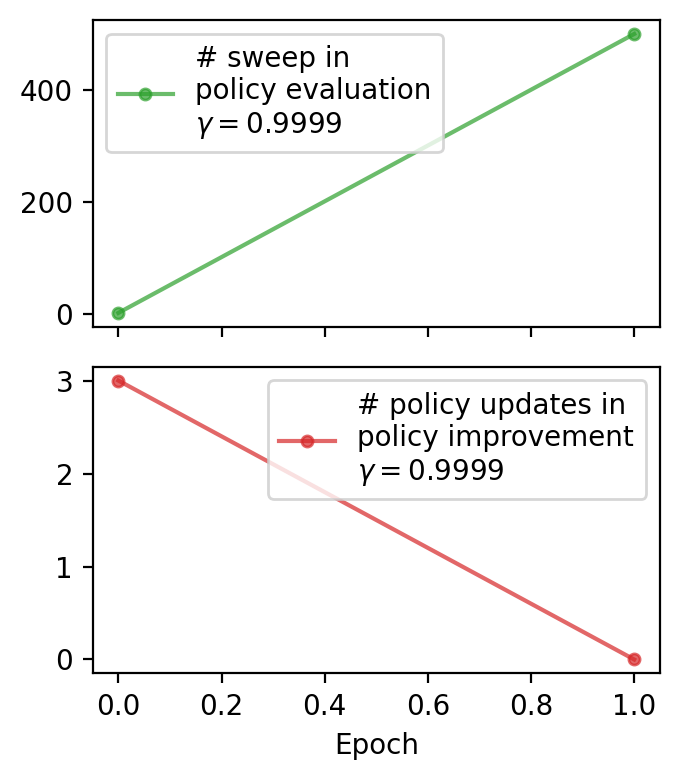

In [8]:
solver = PolicyIteration(mdp_model.reward_function, mdp_model.transition_model, gamma=0.9999, sa_reward=sa_reward)
solver.train(total_epochs=100,eval_epochs=500)
policy_save_path = 'dynamic_programming/ib_policy.pkl'

trained_policy = DPPolicy(policy_table=solver.policy, state_to_index=mdp_model.state_to_index,
                        index_to_action=mdp_model.index_to_actions)
trained_policy.save(policy_save_path)

In [9]:
print(solver.values)


[52325.20579549 51872.00274468 52261.09227226]
